# 準備

## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('C:\\Users\\stone\\Documents\\資格\\E資格\\深層学習day1_2\\DNN_code_colab_lesson_1_2')
sys.path.append('C:\\Users\\stone\\Documents\\資格\\E資格\\深層学習day1_2\\DNN_code_colab_lesson_1_2\\lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18333333333333332
                : 10. 正答率(テスト) = 0.1496
Generation: 20. 正答率(トレーニング) = 0.24333333333333335
                : 20. 正答率(テスト) = 0.1918
Generation: 30. 正答率(トレーニング) = 0.32666666666666666
                : 30. 正答率(テスト) = 0.2419
Generation: 40. 正答率(トレーニング) = 0.4266666666666667
                : 40. 正答率(テスト) = 0.3102
Generation: 50. 正答率(トレーニング) = 0.47
                : 50. 正答率(テスト) = 0.3641
Generation: 60. 正答率(トレーニング) = 0.5666666666666667
                : 60. 正答率(テスト) = 0.4563
Generation: 70. 正答率(トレーニング) = 0.64
                : 70. 正答率(テスト) = 0.4891
Generation: 80. 正答率(トレーニング) = 0.6966666666666667
                : 80. 正答率(テスト) = 0.5318
Generation: 90. 正答率(トレーニング) = 0.72
                : 90. 正答率(テスト) = 0.5643
Generation: 100. 正答率(トレーニング) = 0.7633333333333333
                : 100. 正答率(テスト) = 0.6003
Generation: 110. 正答率(トレーニング) = 0.8266666666666667
                : 110. 正答率(テスト) = 0.6303
Generation: 120. 正答率(トレーニング) = 0.84
          

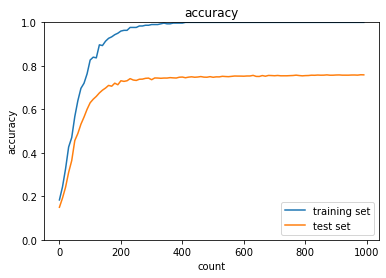

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11666666666666667
                : 10. 正答率(テスト) = 0.1131
Generation: 20. 正答率(トレーニング) = 0.17666666666666667
                : 20. 正答率(テスト) = 0.1426
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.1757
Generation: 40. 正答率(トレーニング) = 0.2966666666666667
                : 40. 正答率(テスト) = 0.2014
Generation: 50. 正答率(トレーニング) = 0.34
                : 50. 正答率(テスト) = 0.2281
Generation: 60. 正答率(トレーニング) = 0.3466666666666667
                : 60. 正答率(テスト) = 0.2455
Generation: 70. 正答率(トレーニング) = 0.44666666666666666
                : 70. 正答率(テスト) = 0.2882
Generation: 80. 正答率(トレーニング) = 0.47
                : 80. 正答率(テスト) = 0.324
Generation: 90. 正答率(トレーニング) = 0.52
                : 90. 正答率(テスト) = 0.3528
Generation: 100. 正答率(トレーニング) = 0.5333333333333333
                : 100. 正答率(テスト) = 0.3777
Generation: 110. 正答率(トレーニング) = 0.59
                : 110. 正答率(テスト) = 0.4149
Generation: 120. 正答率(トレーニング) = 0.6066666666666667
                : 120. 正答

Generation: 970. 正答率(トレーニング) = 0.89
                : 970. 正答率(テスト) = 0.7021
Generation: 980. 正答率(トレーニング) = 0.89
                : 980. 正答率(テスト) = 0.7097
Generation: 990. 正答率(トレーニング) = 0.9
                : 990. 正答率(テスト) = 0.7099
Generation: 1000. 正答率(トレーニング) = 0.8866666666666667
                : 1000. 正答率(テスト) = 0.7034


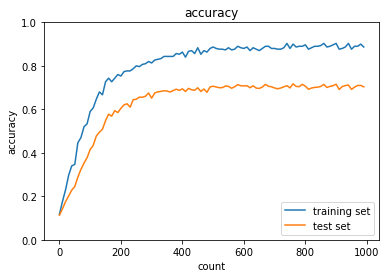

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.47333333333333333
                : 10. 正答率(テスト) = 0.3837
Generation: 20. 正答率(トレーニング) = 0.6833333333333333
                : 20. 正答率(テスト) = 0.5058
Generation: 30. 正答率(トレーニング) = 0.8366666666666667
                : 30. 正答率(テスト) = 0.6567
Generation: 40. 正答率(トレーニング) = 0.67
                : 40. 正答率(テスト) = 0.548
Generation: 50. 正答率(トレーニング) = 0.69
                : 50. 正答率(テスト) = 0.5414
Generation: 60. 正答率(トレーニング) = 0.8133333333333334
                : 60. 正答率(テスト) = 0.6504
Generation: 70. 正答率(トレーニング) = 0.8133333333333334
                : 70. 正答率(テスト) = 0.6072
Generation: 80. 正答率(トレーニング) = 0.8
                : 80. 正答率(テスト) = 0.6476
Generation: 90. 正答率(トレーニング) = 0.8366666666666667
                : 90. 正答率(テスト) = 0.6087
Generation: 100. 正答率(トレーニング) = 0.8933333333333333
                : 100. 正答率(テスト) = 0.7047
Generation: 110. 正答率(トレーニング) = 0.82
                : 110. 正答率(テスト) = 0.6635
Generation: 120. 正答率(トレーニング) = 0.8033333333333333
              

Generation: 960. 正答率(トレーニング) = 0.98
                : 960. 正答率(テスト) = 0.7323
Generation: 970. 正答率(トレーニング) = 0.9933333333333333
                : 970. 正答率(テスト) = 0.7515
Generation: 980. 正答率(トレーニング) = 0.9933333333333333
                : 980. 正答率(テスト) = 0.7445
Generation: 990. 正答率(トレーニング) = 0.9633333333333334
                : 990. 正答率(テスト) = 0.7149
Generation: 1000. 正答率(トレーニング) = 0.8833333333333333
                : 1000. 正答率(テスト) = 0.6843


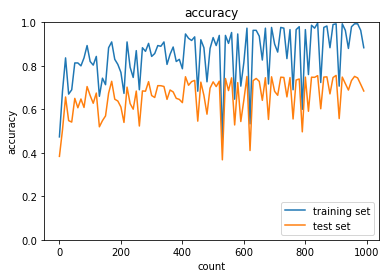

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了


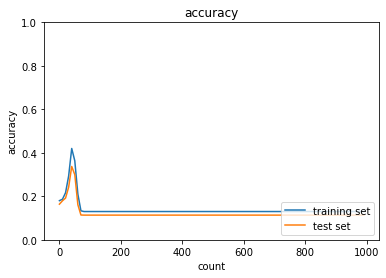

In [9]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 1.0
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


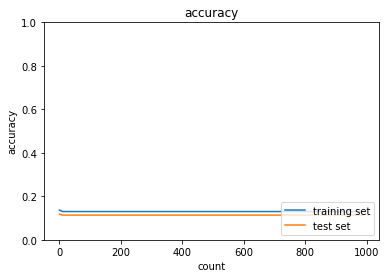

In [10]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 10.0
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

正則化項を大きくすることで、過学習は防げたものの、今度はaccuracyが向上しない、つまり予測精度が極端に低くなってしまった。
正則化項の決め方は難しい...

## Dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09666666666666666
                : 10. 正答率(テスト) = 0.0851
Generation: 20. 正答率(トレーニング) = 0.09666666666666666
                : 20. 正答率(テスト) = 0.0938
Generation: 30. 正答率(トレーニング) = 0.10333333333333333
                : 30. 正答率(テスト) = 0.1079
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1262
Generation: 50. 正答率(トレーニング) = 0.16
                : 50. 正答率(テスト) = 0.1353
Generation: 60. 正答率(トレーニング) = 0.16666666666666666
                : 60. 正答率(テスト) = 0.142
Generation: 70. 正答率(トレーニング) = 0.18666666666666668
                : 70. 正答率(テスト) = 0.1523
Generation: 80. 正答率(トレーニング) = 0.19666666666666666
                : 80. 正答率(テスト) = 0.1629
Generation: 90. 正答率(トレーニング) = 0.2
                : 90. 正答率(テスト) = 0.173
Generation: 100. 正答率(トレーニング) = 0.23333333333333334
                : 100. 正答率(テスト) = 0.1822
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.193
Generation: 120. 正答率(トレーニング) = 0.27666666666666667
         

Generation: 980. 正答率(トレーニング) = 0.8733333333333333
                : 980. 正答率(テスト) = 0.6864
Generation: 990. 正答率(トレーニング) = 0.8833333333333333
                : 990. 正答率(テスト) = 0.6843
Generation: 1000. 正答率(トレーニング) = 0.89
                : 1000. 正答率(テスト) = 0.6904


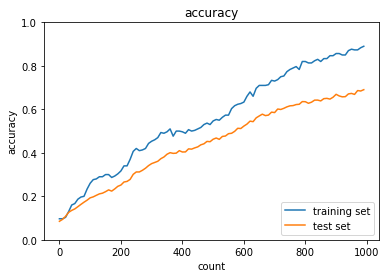

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

データ読み込み完了


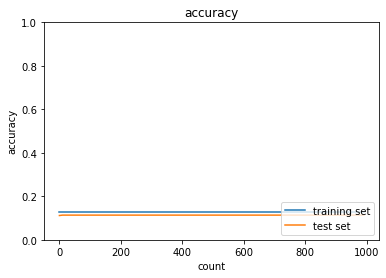

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.01
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

dropout_rationを減らすと過学習が発生し、traing_setのaccuracyのみ上がると思っていたが違った。
dropoutを適切にすることで、無駄なノードが削減されノイズが減ることで精度があがるのだろう。

データ読み込み完了


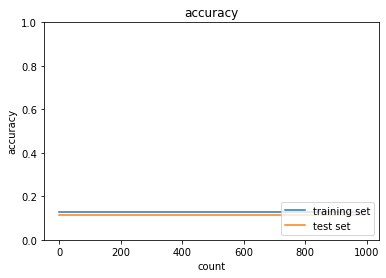

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.9
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

drop_out_rateを高くしすぎることで本来減らしてはいけないノードまでドロップアウトされてしまい、accuracyは向上しなかったと思われる。

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了


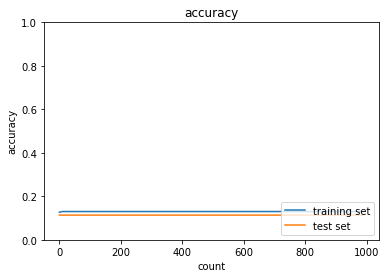

In [15]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.01
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

モーメンタムに変更しても状況は変わらなかった

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11333333333333333
                : 10. 正答率(テスト) = 0.099
Generation: 20. 正答率(トレーニング) = 0.11666666666666667
                : 20. 正答率(テスト) = 0.1008
Generation: 30. 正答率(トレーニング) = 0.12666666666666668
                : 30. 正答率(テスト) = 0.1078
Generation: 40. 正答率(トレーニング) = 0.12666666666666668
                : 40. 正答率(テスト) = 0.1152
Generation: 50. 正答率(トレーニング) = 0.14333333333333334
                : 50. 正答率(テスト) = 0.1303
Generation: 60. 正答率(トレーニング) = 0.16333333333333333
                : 60. 正答率(テスト) = 0.1399
Generation: 70. 正答率(トレーニング) = 0.18666666666666668
                : 70. 正答率(テスト) = 0.16
Generation: 80. 正答率(トレーニング) = 0.19
                : 80. 正答率(テスト) = 0.1711
Generation: 90. 正答率(トレーニング) = 0.21666666666666667
                : 90. 正答率(テスト) = 0.1926
Generation: 100. 正答率(トレーニング) = 0.23666666666666666
                : 100. 正答率(テスト) = 0.2108
Generation: 110. 正答率(トレーニング) = 0.2833333333333333
                : 110. 正答率(テスト) = 0.2336
Generation: 120

Generation: 960. 正答率(トレーニング) = 0.9566666666666667
                : 960. 正答率(テスト) = 0.7446
Generation: 970. 正答率(トレーニング) = 0.9566666666666667
                : 970. 正答率(テスト) = 0.7377
Generation: 980. 正答率(トレーニング) = 0.9533333333333334
                : 980. 正答率(テスト) = 0.738
Generation: 990. 正答率(トレーニング) = 0.9533333333333334
                : 990. 正答率(テスト) = 0.7419
Generation: 1000. 正答率(トレーニング) = 0.9533333333333334
                : 1000. 正答率(テスト) = 0.7444


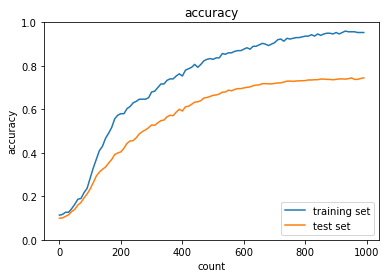

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()